In [350]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np # 1.22.4
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from tqdm import tqdm

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [351]:
src_path = "/content/drive/MyDrive/Research/Adversarial_Attacks_Harmonizer/FGSM.csv"

df = pd.read_csv(src_path)
df.head()

,model,epsilon,num_correct,num_correct_perturbated,attack_success_rate
0,resnet50_trained_on_SIN,0.05,568,45,0.9208
1,resnet50_trained_on_SIN,0.10,568,45,0.9208
2,resnet50_trained_on_SIN,0.15,568,35,0.9384
3,resnet50_trained_on_SIN,0.20,568,24,0.9577
4,resnet50_trained_on_SIN,0.25,568,16,0.9718


In [352]:
model_families = ['resnet', 'bagnet', 'efficientnet', 'vit', 'csp', 'dpn', 'darknet' ,'hrnet', 'selecsls', 'BiTM', 'swag']

In [353]:
def visualize(filtered_df, model_family):

  filtered_df = filtered_df.reset_index(drop=True)

  # Group the rows by every 6 rows
  groups = filtered_df.groupby(filtered_df.index // 6)

  # print(len(groups))

  # Get a colormap with as many colors as there are groups
  colors = cm.rainbow_r(np.linspace(0, 1, len(groups)))

  # Create a plot
  fig, ax = plt.subplots()

  # Loop over the groups and plot each one as a line chart with a different color
  for i, (_, group) in enumerate(groups):
      # print(group)
      ax.plot(group['epsilon'], group['attack_success_rate'], color=colors[i], label=group['model'].iloc[0])

  # Set the x-axis label
  ax.set_xlabel('Epsilon')

  # Set the y-axis label
  ax.set_ylabel('Attack Success Rate')

  # Add a legend
  ax.legend()

  # Show the plot
  plt.show()

# ResNet

In [354]:
filtered_df = df[df['model'].str.startswith('resnet50_trained')]
filtered_df

,model,epsilon,num_correct,num_correct_perturbated,attack_success_rate
0,resnet50_trained_on_SIN,0.05,568,45,0.9208
1,resnet50_trained_on_SIN,0.10,568,45,0.9208
2,resnet50_trained_on_SIN,0.15,568,35,0.9384
3,resnet50_trained_on_SIN,0.20,568,24,0.9577
4,resnet50_trained_on_SIN,0.25,568,16,0.9718
5,resnet50_trained_on_SIN,0.30,568,11,0.9806
6,resnet50_trained_on_SIN_and_IN,0.05,634,51,0.9196
7,resnet50_trained_on_SIN_and_IN,0.10,634,51,0.9196
8,resnet50_trained_on_SIN_and_IN,0.15,634,37,0.9416
9,resnet50_trained_on_SIN_and_IN,0.20,634,23,0.9637


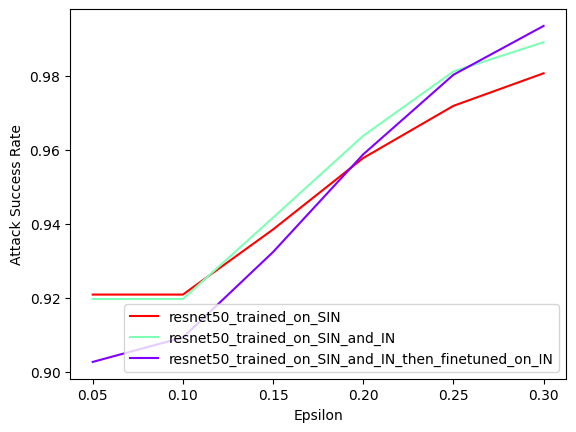

In [355]:
visualize(filtered_df, 'resnet50_trained')

In [356]:
filtered_df = df[df['model'].str.startswith('resnet50_l2')]
filtered_df

,model,epsilon,num_correct,num_correct_perturbated,attack_success_rate
60,resnet50_l2_eps0,0.05,605,42,0.9306
61,resnet50_l2_eps0,0.10,605,28,0.9537
62,resnet50_l2_eps0,0.15,605,18,0.9702
63,resnet50_l2_eps0,0.20,605,11,0.9818
64,resnet50_l2_eps0,0.25,605,5,0.9917
65,resnet50_l2_eps0,0.30,605,4,0.9934
66,resnet50_l2_eps0_01,0.05,558,22,0.9606
67,resnet50_l2_eps0_01,0.10,558,14,0.9749
68,resnet50_l2_eps0_01,0.15,558,7,0.9875
69,resnet50_l2_eps0_01,0.20,558,4,0.9928


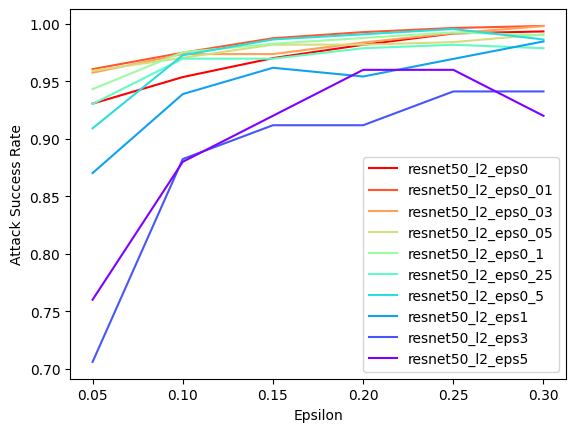

In [357]:
visualize(filtered_df, 'resnet50_l2')

In [358]:
filtered_df = df[df['model'].str.startswith('resnet50_clip')]
filtered_df

,model,epsilon,num_correct,num_correct_perturbated,attack_success_rate
325,resnet50_clip_hard_labels,0.05,221,2,0.9910
326,resnet50_clip_hard_labels,0.10,221,1,0.9955
327,resnet50_clip_hard_labels,0.15,221,2,0.9910
328,resnet50_clip_hard_labels,0.20,221,2,0.9910
329,resnet50_clip_hard_labels,0.25,221,1,0.9955
330,resnet50_clip_hard_labels,0.30,221,2,0.9910
331,resnet50_clip_soft_labels,0.05,451,34,0.9246
332,resnet50_clip_soft_labels,0.10,451,26,0.9424
333,resnet50_clip_soft_labels,0.15,451,23,0.9490
334,resnet50_clip_soft_labels,0.20,451,15,0.9667


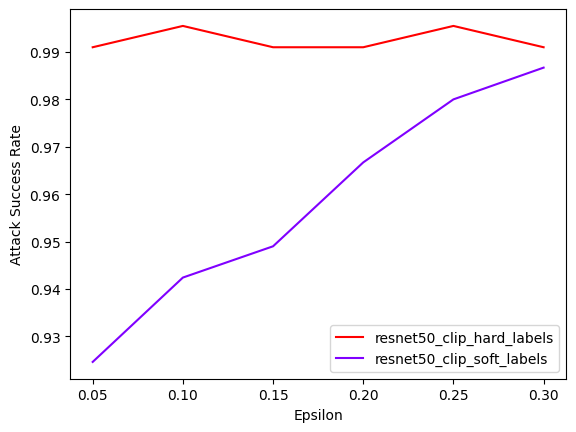

In [359]:
visualize(filtered_df, 'resnet50_clip_')

# BagNet

In [360]:
filtered_df = df[df['model'].str.startswith('bagnet')]
filtered_df

,model,epsilon,num_correct,num_correct_perturbated,attack_success_rate
18,bagnet9,0.05,36,1,0.9722
19,bagnet9,0.10,36,1,0.9722
20,bagnet9,0.15,36,0,1.0000
21,bagnet9,0.20,36,0,1.0000
22,bagnet9,0.25,36,0,1.0000
23,bagnet9,0.30,36,0,1.0000
24,bagnet17,0.05,93,2,0.9785
25,bagnet17,0.10,93,2,0.9785
26,bagnet17,0.15,93,2,0.9785
27,bagnet17,0.20,93,1,0.9892


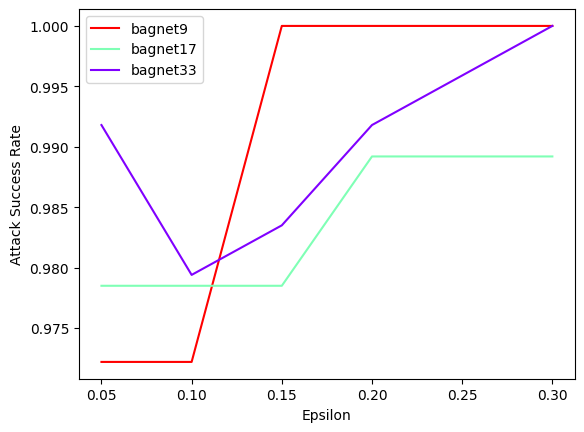

In [361]:
visualize(filtered_df, 'bagnet')

# efficientnet

In [362]:
filtered_df = df[df['model'].str.startswith('efficientnet')]
filtered_df

,model,epsilon,num_correct,num_correct_perturbated,attack_success_rate
120,efficientnet_b0,0.05,701,75,0.8930
121,efficientnet_b0,0.10,701,45,0.9358
122,efficientnet_b0,0.15,701,28,0.9601
123,efficientnet_b0,0.20,701,20,0.9715
124,efficientnet_b0,0.25,701,9,0.9872
125,efficientnet_b0,0.30,701,5,0.9929
126,efficientnet_es,0.05,705,86,0.8780
127,efficientnet_es,0.10,705,80,0.8865
128,efficientnet_es,0.15,705,37,0.9475
129,efficientnet_es,0.20,705,15,0.9787


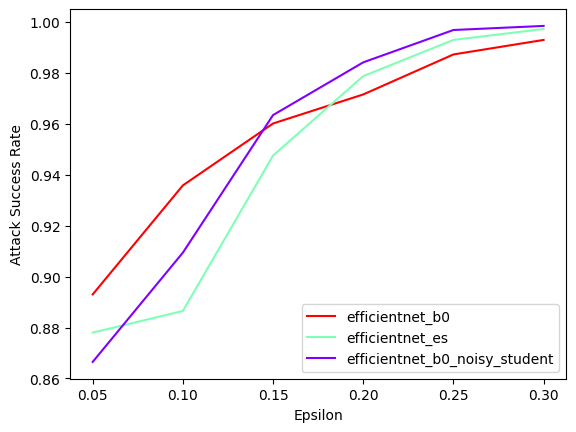

In [363]:
visualize(filtered_df, "efficientnet")

# ViT

In [364]:
filtered_df = df[df['model'].str.startswith('vit')]
filtered_df

,model,epsilon,num_correct,num_correct_perturbated,attack_success_rate
138,vit_small_patch16_224,0.05,812,165,0.7968
139,vit_small_patch16_224,0.10,812,145,0.8214
140,vit_small_patch16_224,0.15,812,127,0.8436
141,vit_small_patch16_224,0.20,812,105,0.8707
142,vit_small_patch16_224,0.25,812,62,0.9236
143,vit_small_patch16_224,0.30,812,31,0.9618
144,vit_base_patch16_224,0.05,894,453,0.4933
145,vit_base_patch16_224,0.10,894,407,0.5447
146,vit_base_patch16_224,0.15,894,343,0.6163
147,vit_base_patch16_224,0.20,894,263,0.7058


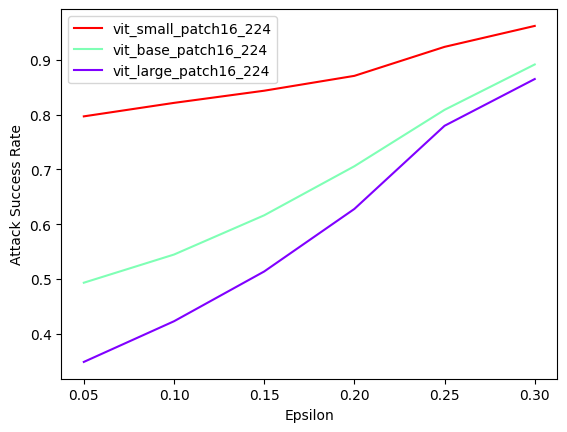

In [365]:
visualize(filtered_df, "vit") 

# CSP

In [366]:
filtered_df = df[df['model'].str.startswith('csp')]
filtered_df

,model,epsilon,num_correct,num_correct_perturbated,attack_success_rate
156,cspresnet50,0.05,859,314,0.6345
157,cspresnet50,0.10,859,299,0.6519
158,cspresnet50,0.15,859,249,0.7101
159,cspresnet50,0.20,859,174,0.7974
160,cspresnet50,0.25,859,86,0.8999
161,cspresnet50,0.30,859,42,0.9511
162,cspresnext50,0.05,896,360,0.5982
163,cspresnext50,0.10,896,364,0.5938
164,cspresnext50,0.15,896,322,0.6406
165,cspresnext50,0.20,896,264,0.7054


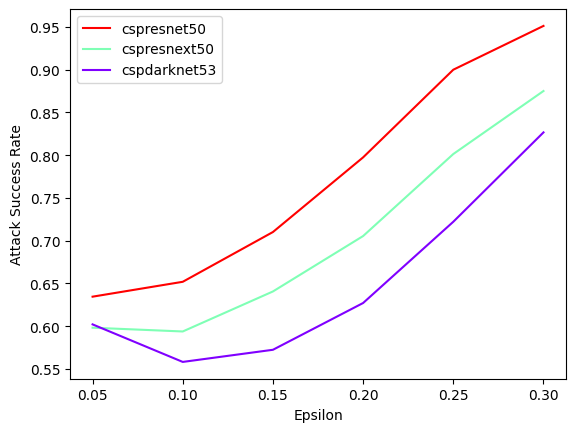

In [367]:
visualize(filtered_df, "csp")

# DPN

In [368]:
filtered_df = df[df['model'].str.startswith('dpn')]
filtered_df

,model,epsilon,num_correct,num_correct_perturbated,attack_success_rate
180,dpn68,0.05,619,75,0.8788
181,dpn68,0.10,619,73,0.8821
182,dpn68,0.15,619,64,0.8966
183,dpn68,0.20,619,40,0.9354
184,dpn68,0.25,619,18,0.9709
185,dpn68,0.30,619,12,0.9806
186,dpn68b,0.05,827,355,0.5707
187,dpn68b,0.10,827,322,0.6106
188,dpn68b,0.15,827,269,0.6747
189,dpn68b,0.20,827,170,0.7944


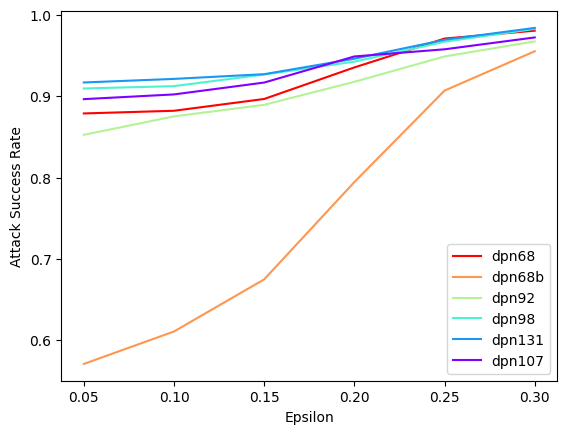

In [369]:
visualize(filtered_df, "dpn")

# DarkNet

In [370]:
filtered_df = df[df['model'].str.startswith('darknet')]
filtered_df

,model,epsilon,num_correct,num_correct_perturbated,attack_success_rate
174,darknet53,0.05,838,334,0.6014
175,darknet53,0.10,838,308,0.6325
176,darknet53,0.15,838,223,0.7339
177,darknet53,0.20,838,140,0.8329
178,darknet53,0.25,838,83,0.9010
179,darknet53,0.30,838,43,0.9487


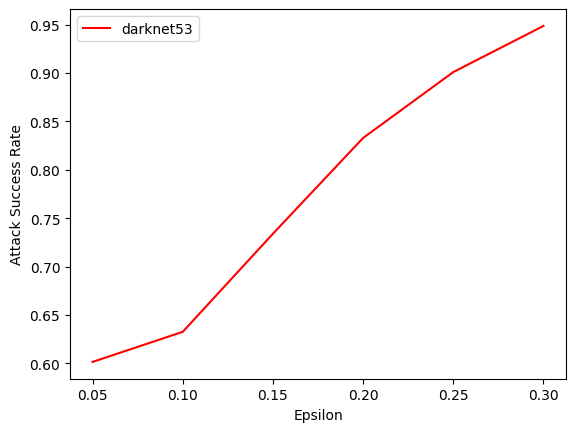

In [371]:
visualize(filtered_df, "darknet")

# HRNet

In [372]:
filtered_df = df[df['model'].str.startswith('hrnet')]
filtered_df

,model,epsilon,num_correct,num_correct_perturbated,attack_success_rate
216,hrnet_w18_small,0.05,404,2,0.9950
217,hrnet_w18_small,0.10,404,1,0.9975
218,hrnet_w18_small,0.15,404,2,0.9950
219,hrnet_w18_small,0.20,404,2,0.9950
220,hrnet_w18_small,0.25,404,1,0.9975
221,hrnet_w18_small,0.30,404,1,0.9975
222,hrnet_w18_small,0.05,404,2,0.9950
223,hrnet_w18_small,0.10,404,1,0.9975
224,hrnet_w18_small,0.15,404,2,0.9950
225,hrnet_w18_small,0.20,404,2,0.9950


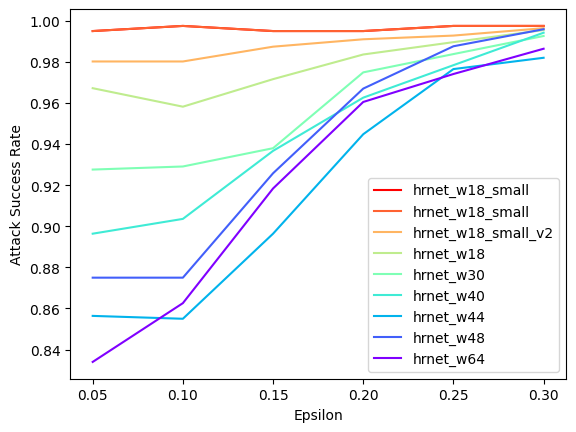

In [373]:
visualize(filtered_df, "hrnet")

# SelecSLS

In [374]:
filtered_df = df[df['model'].str.startswith('selecsls')]
filtered_df

,model,epsilon,num_correct,num_correct_perturbated,attack_success_rate
270,selecsls42,0.05,1,0,1.0000
271,selecsls42,0.10,1,0,1.0000
272,selecsls42,0.15,1,0,1.0000
273,selecsls42,0.20,0,0,NaN
274,selecsls42,0.25,1,0,1.0000
275,selecsls42,0.30,1,0,1.0000
276,selecsls84,0.05,1,0,1.0000
277,selecsls84,0.10,2,0,1.0000
278,selecsls84,0.15,1,0,1.0000
279,selecsls84,0.20,1,1,0.0000


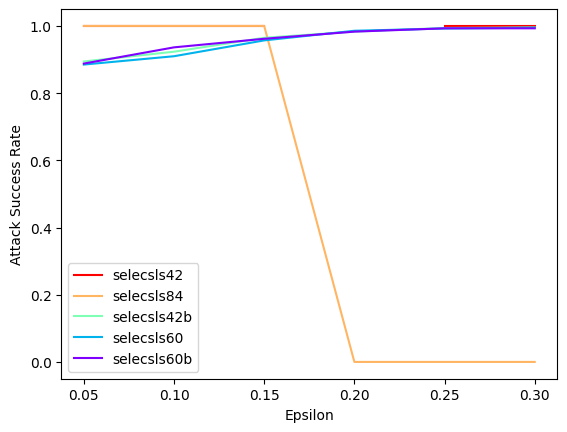

In [375]:
visualize(filtered_df, "selecsls")

# BiTM

In [376]:
filtered_df = df[df['model'].str.startswith('BiTM')]
filtered_df

,model,epsilon,num_correct,num_correct_perturbated,attack_success_rate
306,BiTM_resnetv2_50x1,0.05,738,278,0.6233
307,BiTM_resnetv2_50x1,0.10,738,265,0.6409
308,BiTM_resnetv2_50x1,0.15,738,244,0.6694
309,BiTM_resnetv2_50x1,0.20,738,184,0.7507
310,BiTM_resnetv2_50x1,0.25,738,134,0.8184
311,BiTM_resnetv2_50x1,0.30,738,75,0.8984
312,BiTM_resnetv2_50x3,0.05,811,455,0.4390
313,BiTM_resnetv2_50x3,0.10,811,438,0.4599
314,BiTM_resnetv2_50x3,0.15,811,408,0.4969
315,BiTM_resnetv2_50x3,0.20,811,359,0.5573


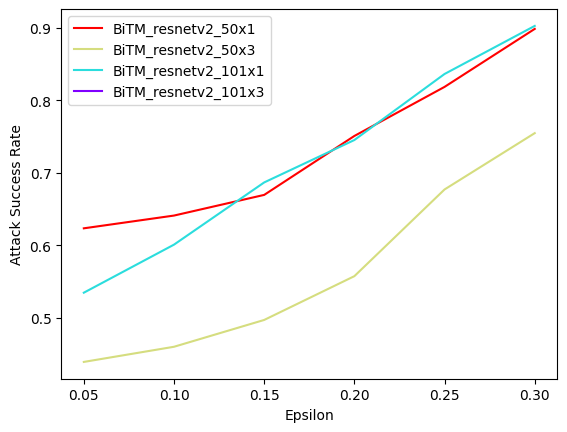

In [377]:
visualize(filtered_df, "BiTM")

# SWAG

In [378]:
filtered_df = df[df['model'].str.startswith('swag')]
filtered_df

,model,epsilon,num_correct,num_correct_perturbated,attack_success_rate
337,swag_regnety_16gf_in1k,0.05,677,163,0.7592
338,swag_regnety_16gf_in1k,0.10,677,186,0.7253
339,swag_regnety_16gf_in1k,0.15,677,193,0.7149
340,swag_regnety_16gf_in1k,0.20,677,171,0.7474
341,swag_regnety_16gf_in1k,0.25,677,114,0.8316
342,swag_regnety_16gf_in1k,0.30,677,73,0.8922
343,swag_regnety_32gf_in1k,0.05,711,203,0.7145
344,swag_regnety_32gf_in1k,0.10,711,213,0.7004
345,swag_regnety_32gf_in1k,0.15,711,181,0.7454
346,swag_regnety_32gf_in1k,0.20,711,150,0.7890


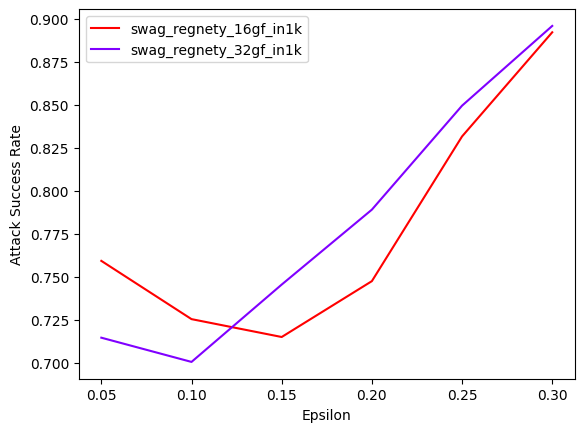

In [379]:
visualize(filtered_df, "swag")